In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, validation_curve, train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("DATA/train.csv")
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df.columns

Index(['YEAR', 'MONTH', 'DAYOFMONTH', 'DAYOFWEEK', 'FLIGHTDATE',
       'REPORTING_AIRLINE', 'FLIGHT_NUMBER_REPORTING_AIRLINE', 'ORIGIN',
       'DEST', 'CRSDEPTIME', 'DEPTIME', 'DEPDELAY', 'DEPDELAYMINUTES',
       'DEPDEL15', 'DEPARTUREDELAYGROUPS', 'CRSELAPSEDTIME',
       'ACTUALELAPSEDTIME', 'AIRTIME', 'DISTANCE', 'DISTANCEGROUP',
       'CARRIERDELAY', 'WEATHERDELAY', 'NASDELAY', 'SECURITYDELAY', 'DEPHOUR',
       'DEPMINUTE', 'FLIGHTSSAMETIME', 'DELAY_BIN', 'FLIGHTSSAMETIMEBIN',
       'TOP30AIRPORTS', 'FLIGHTSSAMETIME80'],
      dtype='object')

In [4]:
features = ['DAYOFMONTH', 'REPORTING_AIRLINE', 'ORIGIN', 'CRSDEPTIME', 'DISTANCEGROUP', 'DEPDEL15', 'FLIGHTSSAMETIME'] # Elijo los features relevantes

In [5]:
df[features].isna().sum()

DAYOFMONTH           0
REPORTING_AIRLINE    0
ORIGIN               0
CRSDEPTIME           0
DISTANCEGROUP        0
DEPDEL15             0
FLIGHTSSAMETIME      0
dtype: int64

In [6]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386491 entries, 0 to 386490
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DAYOFMONTH         386491 non-null  int64  
 1   REPORTING_AIRLINE  386491 non-null  object 
 2   ORIGIN             386491 non-null  object 
 3   CRSDEPTIME         386491 non-null  int64  
 4   DISTANCEGROUP      386491 non-null  int64  
 5   DEPDEL15           386491 non-null  float64
 6   FLIGHTSSAMETIME    386491 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 20.6+ MB


In [7]:
df['DEPDEL15'].count()/86662

4.459751678936558

In [8]:
X = df[features]
y = df['DEPDEL15']
X = X.drop(columns=['DEPDEL15'])

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386491 entries, 0 to 386490
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DAYOFMONTH         386491 non-null  int64 
 1   REPORTING_AIRLINE  386491 non-null  object
 2   ORIGIN             386491 non-null  object
 3   CRSDEPTIME         386491 non-null  int64 
 4   DISTANCEGROUP      386491 non-null  int64 
 5   FLIGHTSSAMETIME    386491 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 17.7+ MB


In [10]:
X = X.reset_index(drop=True)

In [11]:
dummies_airline = X['REPORTING_AIRLINE'].str.get_dummies(sep = ',')
dummies_origin = X['ORIGIN'].str.get_dummies(sep = ',')
X = pd.concat([X, dummies_airline], axis = 1)
X = X.drop(columns=['REPORTING_AIRLINE', 'ORIGIN'])

## Modelo

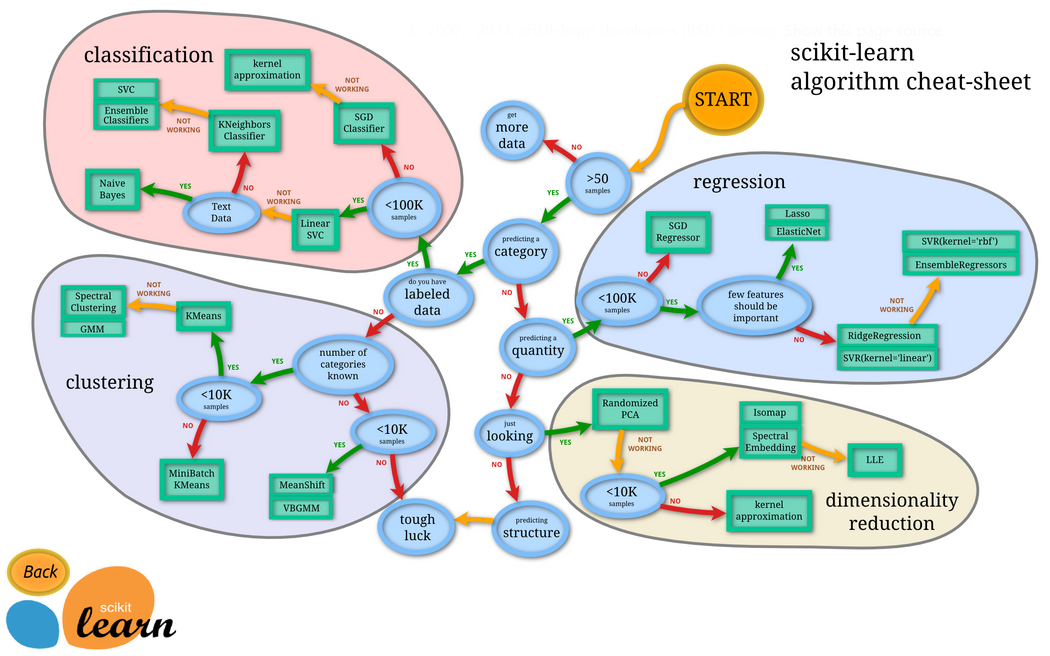

## Test, train, val sobre test dataset

In [69]:
x_train, x_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.3, random_state=27)

In [70]:
scaler = StandardScaler()
scaler.fit(x_train)  
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)  

### Grid Search, Ajuste de parametros

In [14]:
# clf = SGDClassifier()

In [15]:
# param_grid = {
#     'loss': ['hinge', 'log_loss', 'perceptron'],
#     'alpha': np.logspace(-4, 4, 9),
#     'penalty': ['l2', 'l1', 'elasticnet'],
# }

In [16]:
# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(x_train, y_train)

In [17]:
# print("Best parameters found: ", grid_search.best_params_)

In [18]:
# param_name = 'loss'
# param_range=['hinge', 'log_loss', 'perceptron']
# train_scores, val_scores = validation_curve(
#     SGDClassifier(),
#     x_train, y_train,
#     param_name= param_name,
#     param_range=param_range,
#     scoring='accuracy',
#     cv=5
# )

In [19]:
# plt.figure(figsize=(10, 6))
# plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
# plt.plot(param_range, np.mean(val_scores, axis=1), label='Validation Accuracy')
# plt.xlabel(param_name)
# plt.ylabel('Accuracy')
# plt.title(f'Validation Curve for {param_name}')
# plt.legend()
# plt.show()

## Fit

In [71]:
# Best params
clf = SGDClassifier(loss = 'hinge', penalty='l2')
clf.fit(x_train, y_train)
clf.score(x_val, y_val)

0.775770172836099

In [101]:
from sklearn import metrics

## Preparacion de test

In [21]:
test = pd.read_csv('DATA/test_data.csv')

In [22]:
test.columns = test.columns.str.upper()

In [23]:
test['FLIGHTDATE'] = pd.to_datetime(test['FLIGHTDATE'])
test['CRSDEPTIME'] = test['CRSDEPTIME'].astype(str)
test['CRSDEPTIME'] = test['CRSDEPTIME'].str.zfill(4)
test['DEPHOUR'] = test['CRSDEPTIME'].str[:-2]
test['DEPMINUTE'] = test['CRSDEPTIME'].str[-2:]
test['DEPHOUR'] = test['DEPHOUR'].str.zfill(2)
test['DEPMINUTE'] = test['DEPMINUTE'].str.zfill(2)

flight_counts = test.groupby(['ORIGIN', 'MONTH', 'DAYOFMONTH', 'DEPHOUR']).size().reset_index(name='FLIGHTSSAMETIME')
test = test.merge(flight_counts, on=['ORIGIN', 'MONTH', 'DAYOFMONTH', 'DEPHOUR'], how='left')
test['FLIGHTSSAMETIME'] = test['FLIGHTSSAMETIME'].fillna(0).astype(int)

In [24]:
test = test[features]

In [25]:
y_true = test['DEPDEL15']
test = test.drop(columns='DEPDEL15')

In [26]:
dummies_airline = test['REPORTING_AIRLINE'].str.get_dummies(sep = ',')
dummies_origin = test['ORIGIN'].str.get_dummies(sep = ',')
test = pd.concat([test, dummies_airline], axis = 1)
test = test.drop(columns=['REPORTING_AIRLINE', 'ORIGIN'])

In [72]:
test = scaler.transform(test)

c:\Users\peric\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Predicciones y accuracy

In [73]:
test_pred = clf.predict(test)

In [74]:
accuracy_score(y_true, test_pred)

0.7732780323474544

In [75]:
mean_squared_error(y_true, test_pred)

0.2267219676525456

In [76]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_true, test_pred).ravel()
false_positive_rate = fp / (fp + tn)

In [77]:
false_positive_rate

0.009528180078714435

In [78]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, test_pred)

In [79]:
loss

8.171888017766983

In [80]:
from sklearn.metrics import average_precision_score
avg_precision = average_precision_score(y_true, test_pred)
avg_precision

0.22690939025735535

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, test_pred)

0.7732780323474544

In [82]:
avg_precision

0.22690939025735535

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, test_pred)
tn, fp, fn, tp = cm.ravel()

In [84]:
cm

array([[127341,   1225],
       [ 36329,    744]], dtype=int64)

In [85]:
y_true.values

array([0., 1., 1., ..., 0., 0., 0.])

In [86]:
test_pred.tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [87]:
test

array([[-1.64936546, -2.68061278, -1.9565709 , ...,  9.36995067,
        -1.77714032, -1.2732504 ],
       [-1.82499119, -2.68106444, -1.9565709 , ..., -1.45515202,
        -1.77714032, -1.2732504 ],
       [-1.78446217, -2.6769309 , -1.58697804, ..., -1.45515202,
        -1.77714032, -1.2732504 ],
       ...,
       [-1.68989448, -2.67622518, -0.47819946, ..., -1.45515202,
        -1.77714032, -1.2732504 ],
       [-1.89253954, -2.67986672, -1.77177447, ..., -1.45515202,
        -1.77714032, -1.2732504 ],
       [-1.82499119, -2.67971348, -1.77177447, ..., -1.45515202,
         4.29506357, -1.2732504 ]])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

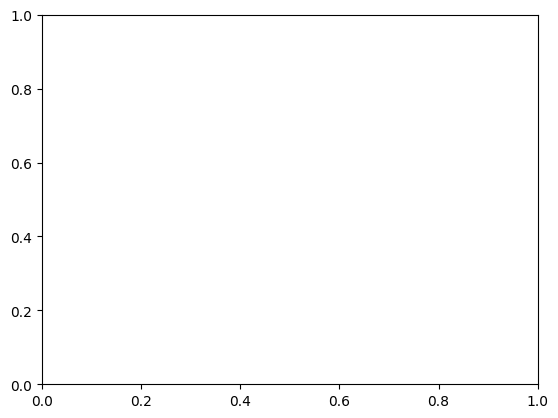

In [88]:
from scikitplot.metrics import plot_roc

# Plot ROC curve
fig, ax = plt.subplots()
plot_roc(clf, x_val, y_val, ax=ax)
plt.show()

In [57]:
test_pred.tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

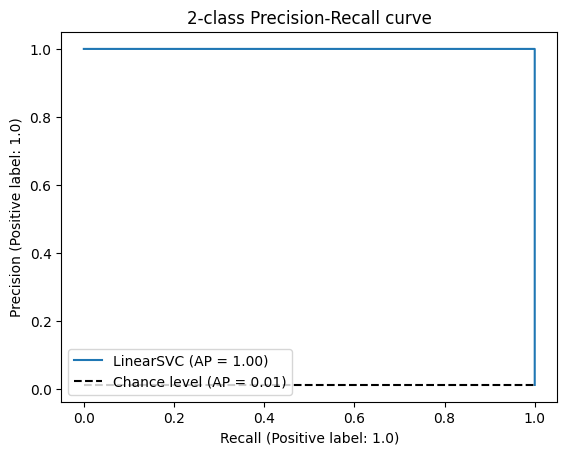

In [109]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, test, test_pred, name="LinearSVC", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")